<a href="https://colab.research.google.com/github/msiddalingaiah/MachineLearning/blob/master/Regression/DeepHousingModel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## House Price Prediction

This notebook uses a deep learning model to predict house prices based on multiple features. For example, some of these features include:
* Living area
* Lot area
* Number of floors
* Location (zipcode)
* Number of bedrooms and bathrooms

This model should be more accurate than a simple linear regression model based on living area alone.

This includes some visualizations as well.

In [0]:
%tensorflow_version 2.x

In [0]:
import pandas as pd
import numpy as np
import keras
from keras.layers import Dense, Dropout
from keras.models import Sequential
from keras import metrics
from keras.optimizers import Adam

from matplotlib import pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import random

Using TensorFlow backend.


In [0]:
!wget https://raw.githubusercontent.com/msiddalingaiah/MachineLearning/master/Regression/data/kc_house_data.csv -O kc_house_data.csv

--2020-05-10 17:28:04--  https://raw.githubusercontent.com/msiddalingaiah/MachineLearning/master/Regression/data/kc_house_data.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2515206 (2.4M) [text/plain]
Saving to: ‘kc_house_data.csv’

kc_house_data.csv   100%[===================>]   2.40M  --.-KB/s    in 0.08s   

2020-05-10 17:28:04 (31.2 MB/s) - ‘kc_house_data.csv’ saved [2515206/2515206]



In [0]:
data = pd.read_csv('kc_house_data.csv')
data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [0]:
Y = data['price'].values/1000
#columns = ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'lat', 'long', 'sqft_living15', 'sqft_lot15']
columns = ['sqft_living', 'sqft_lot', 'floors', 'waterfront', 'sqft_above', 'sqft_basement']
dfs = data[columns]

X = dfs.values
scaler = StandardScaler()
X = scaler.fit_transform(X)

zipcodes = pd.get_dummies(data['zipcode']).values
condition = pd.get_dummies(data['condition']).values
grade = pd.get_dummies(data['grade']).values
bedrooms = pd.get_dummies(data['bedrooms']).values
bathrooms = pd.get_dummies(data['bathrooms']).values

X = np.concatenate((X,zipcodes),axis = 1)
X = np.concatenate((X,condition),axis = 1)
X = np.concatenate((X,grade),axis = 1)
X = np.concatenate((X,bedrooms),axis = 1)
X = np.concatenate((X,bathrooms),axis = 1)

x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size = 0.25,random_state=42)

In [0]:
dropout = 0.1

model = Sequential()
model.add(Dense(100, activation="relu", input_shape=(x_train.shape[1],)))
model.add(Dropout(dropout))
model.add(Dense(50, activation="relu"))
model.add(Dropout(dropout))
model.add(Dense(20, activation="relu"))
model.add(Dropout(dropout))
model.add(Dense(1))

In [0]:
model.compile(loss='mean_squared_error', optimizer=Adam())

history = model.fit(x_train,y_train,epochs=20, verbose=1, validation_data=(x_test, y_test))
print(model.evaluate(x_test,y_test))

Train on 16209 samples, validate on 5404 samples
Epoch 1/20
16209/16209 [==============================] - 1s 84us/step - loss: 120888.4617 - val_loss: 41826.6569
Epoch 2/20
16209/16209 [==============================] - 1s 61us/step - loss: 35375.8543 - val_loss: 29615.0107
Epoch 3/20
16209/16209 [==============================] - 1s 60us/step - loss: 29718.5465 - val_loss: 26789.4274
Epoch 4/20
16209/16209 [==============================] - 1s 61us/step - loss: 26407.5093 - val_loss: 22765.3940
Epoch 5/20
16209/16209 [==============================] - 1s 63us/step - loss: 24892.6402 - val_loss: 21530.1348
Epoch 6/20
16209/16209 [==============================] - 1s 60us/step - loss: 23919.7799 - val_loss: 20733.6698
Epoch 7/20
16209/16209 [==============================] - 1s 61us/step - loss: 22240.2751 - val_loss: 20043.5660
Epoch 8/20
16209/16209 [==============================] - 1s 60us/step - loss: 22926.6486 - val_loss: 19685.7185
Epoch 9/20
16209/16209 [======================

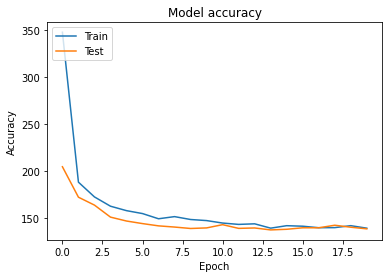

In [0]:
plt.plot(np.sqrt(history.history['loss']))
plt.plot(np.sqrt(history.history['val_loss']))
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [0]:
y_pred = model.predict(x_test).squeeze()

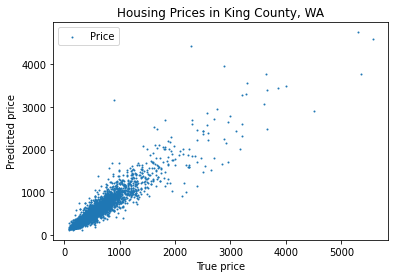

In [0]:
plt.scatter(y_test, y_pred, label="Price", s=1.0)
plt.title("Housing Prices in King County, WA")
plt.xlabel("True price")
plt.ylabel("Predicted price")
plt.legend()
plt.show()

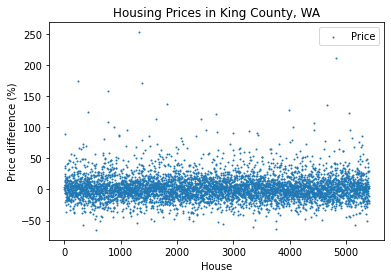

In [0]:
delta = 100*(y_pred - y_test)/y_test
plt.scatter(range(len(delta)), delta, label="Price", s=1.0)
plt.title("Housing Prices in King County, WA")
plt.xlabel("House")
plt.ylabel("Price difference (%)")
plt.legend()
plt.show()

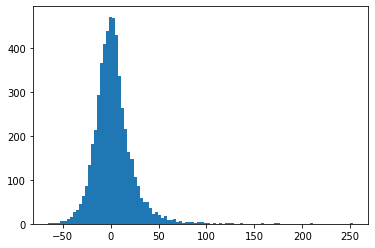

In [0]:
plt.hist(delta, 100)
plt.show()

In [0]:
trainDF, testDF = train_test_split(data, test_size = 0.25,random_state=42)

In [0]:
predDF = pd.DataFrame({'predicted_price' : y_pred*1000, 'delta_percent': delta})

In [0]:
df = pd.concat([predDF, testDF.reset_index()], axis=1)
df.head()

,predicted_price,delta_percent,index,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,3.703206e+05,1.457695,735,2591820310,20141006T000000,365000.0,4,2.25,2070,8893,2.0,0,0,4,8,2070,0,1986,0,98058,47.4388,-122.162,2390,7700
1,8.963821e+05,3.627986,2830,7974200820,20140821T000000,865000.0,5,3.00,2900,6730,1.0,0,0,5,8,1830,1070,1977,0,98115,47.6784,-122.285,2370,6283
2,1.202038e+06,15.803307,4106,7701450110,20140815T000000,1038000.0,4,2.50,3770,10893,2.0,0,2,3,11,3770,0,1997,0,98006,47.5646,-122.129,3710,9685
3,1.524842e+06,2.338367,16218,9522300010,20150331T000000,1490000.0,3,3.50,4560,14608,2.0,0,2,3,12,4560,0,1990,0,98034,47.6995,-122.228,4050,14226
4,7.560432e+05,6.335192,19964,9510861140,20140714T000000,711000.0,3,2.50,2550,5376,2.0,0,0,3,9,2550,0,2004,0,98052,47.6647,-122.083,2250,4050


In [0]:
df[(df.price < 600000) & (df.delta_percent <= -10)]

,predicted_price,delta_percent,index,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
20,361412.50000,-25.481958,3018,2291401425,20140910T000000,485000.0,5,2.00,1910,5508,1.0,0,0,3,7,1020,890,1968,0,98133,47.7074,-122.349,1030,7440
27,173854.03125,-36.780351,18059,1773101530,20141218T000000,275000.0,1,1.00,520,4800,1.0,0,0,3,5,520,0,1930,0,98106,47.5533,-122.363,800,4960
37,391003.31250,-19.380757,5512,1822069109,20140910T000000,485000.0,3,2.50,2540,51836,1.0,0,0,4,8,1820,720,1976,0,98042,47.3890,-122.088,1650,51836
48,386850.53125,-12.378137,2862,9477100490,20150424T000000,441500.0,3,1.75,1510,7700,1.0,0,0,3,7,1510,0,1968,0,98034,47.7283,-122.194,1440,7416
53,463612.21875,-11.692912,7924,2770601800,20141024T000000,525000.0,3,1.75,1560,6000,1.0,0,0,3,6,780,780,1944,0,98199,47.6501,-122.384,1560,1734
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5370,301204.75000,-28.276047,15396,3055800020,20150310T000000,419950.0,4,1.00,1530,7920,1.0,0,0,3,7,1030,500,1955,0,98166,47.4544,-122.360,1690,7920
5375,344486.84375,-23.447367,14767,2960900040,20140521T000000,450000.0,2,1.00,1200,4000,1.0,0,0,3,7,1070,130,1940,0,98126,47.5766,-122.378,1770,4000
5376,206870.31250,-50.151731,7030,1021049022,20140520T000000,415000.0,2,1.00,1050,60113,1.0,0,0,4,7,1050,0,1943,0,98001,47.3226,-122.287,1380,27442
5377,244196.28125,-18.601242,17762,7750500120,20141118T000000,300000.0,3,1.00,950,4760,1.5,0,0,3,6,950,0,1929,0,98106,47.5236,-122.348,1080,4760
